In [3]:
import pandas as pd

In [4]:
data_feat = pd.read_csv('power_consumption_g3_feat.csv')

In [5]:
data_res = pd.read_csv('power_consumption_g3.csv')

In [6]:
data_feat

,Date,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows
0,2017-03-01 16:40:00,21.33,55.91,0.080,387.400,427.300
1,2017-07-27 06:30:00,23.10,48.58,4.908,10.450,8.630
2,2017-10-11 19:00:00,23.10,59.82,0.084,0.446,0.322
3,2017-02-10 06:50:00,12.25,80.80,4.916,0.051,0.111
4,2017-03-06 16:00:00,15.62,59.38,0.075,533.400,579.900
...,...,...,...,...,...,...
52411,2017-05-14 02:20:00,23.58,43.10,0.075,0.110,0.122
52412,2017-11-17 19:20:00,17.30,76.50,0.075,0.040,0.148
52413,2017-03-21 12:10:00,17.90,50.28,0.081,837.000,296.700
52414,2017-07-28 05:10:00,25.23,61.32,4.907,0.091,0.119


In [7]:
data_feat['Date'] = pd.to_datetime(data_feat['Date'])
data_feat.set_index('Date', inplace=True)
data_feat.sort_index(inplace=True)

In [8]:
data_feat.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52416 entries, 2017-01-01 00:00:00 to 2017-12-30 23:50:00
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Temperature          51857 non-null  float64
 1   Humidity             51917 non-null  float64
 2   WindSpeed            51887 non-null  float64
 3   GeneralDiffuseFlows  51892 non-null  float64
 4   DiffuseFlows         51911 non-null  float64
dtypes: float64(5)
memory usage: 2.4 MB


In [9]:
data_res

,Date,SolarPower
0,2017-06-22 11:50:00,35818.80795
1,2017-04-24 22:50:00,34628.20237
2,2017-11-05 09:00:00,22781.53846
3,2017-10-19 23:20:00,31925.77681
4,2017-03-25 17:10:00,30246.12766
...,...,...
52411,2017-02-08 16:10:00,31808.13559
52412,2017-07-04 17:40:00,35816.61130
52413,2017-07-02 17:00:00,31185.64784
52414,2017-08-02 16:40:00,39463.35183


In [10]:
data_res['Date'] = pd.to_datetime(data_res['Date'])
data_res.set_index('Date', inplace=True)
data_res.sort_index(inplace=True)

In [11]:
data_res.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52416 entries, 2017-01-01 00:00:00 to 2017-12-30 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SolarPower  52416 non-null  float64
dtypes: float64(1)
memory usage: 819.0 KB


In [12]:
data = pd.merge(left=data_feat, right=data_res, left_index=True, right_index=True)

In [13]:
data

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,SolarPower
Date,,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076
2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620
...,...,...,...,...,...,...
2017-12-30 23:10:00,7.010,72.4,0.080,NaN,0.096,31160.45627
2017-12-30 23:20:00,6.947,72.6,0.082,0.051,0.093,30430.41825
2017-12-30 23:30:00,6.900,72.8,0.086,0.084,0.074,29590.87452


In [14]:
data.isnull().sum()

Temperature            559
Humidity               499
WindSpeed              529
GeneralDiffuseFlows    524
DiffuseFlows           505
SolarPower               0
dtype: int64

In [15]:
features = data.columns.tolist()[:-1]
features

['Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows', 'DiffuseFlows']

In [16]:
for feature in features:
    data[feature] = data[feature].interpolate(method='linear')

In [17]:
data.isnull().sum()

Temperature            0
Humidity               0
WindSpeed              0
GeneralDiffuseFlows    0
DiffuseFlows           0
SolarPower             0
dtype: int64

In [18]:
data = data.groupby(pd.Grouper(freq='2h')).mean()

In [19]:
data

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,SolarPower
Date,,,,,,
2017-01-01 00:00:00,5.866833,76.300000,0.081917,0.060167,0.105667,26927.594937
2017-01-01 02:00:00,5.029333,78.008333,0.082583,0.061417,0.135083,21447.088607
2017-01-01 04:00:00,4.919667,74.641667,0.081667,0.061917,0.120833,20641.518987
2017-01-01 06:00:00,4.512750,74.575000,0.082417,0.063583,0.122500,20094.683545
2017-01-01 08:00:00,4.632167,73.791667,0.082417,79.281917,15.761833,21255.189872
...,...,...,...,...,...,...
2017-12-30 14:00:00,14.513333,39.675417,0.077667,409.650000,42.163333,29293.789606
2017-12-30 16:00:00,14.015000,43.082500,0.077500,153.905000,152.368333,31262.864386
2017-12-30 18:00:00,10.112500,60.359583,0.075583,1.618917,1.676750,37721.673005


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

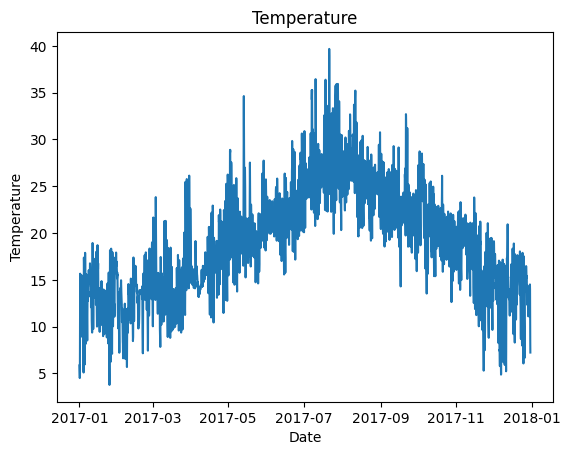

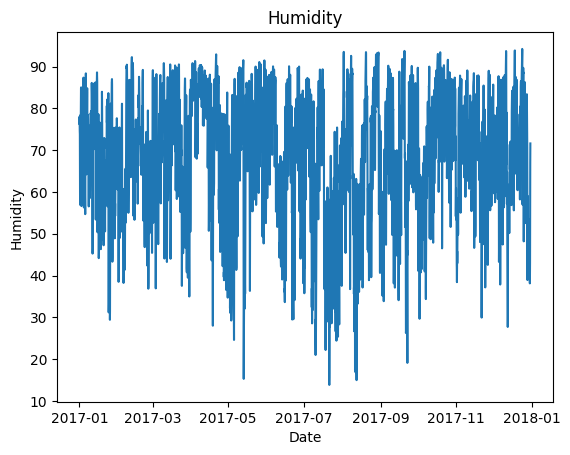

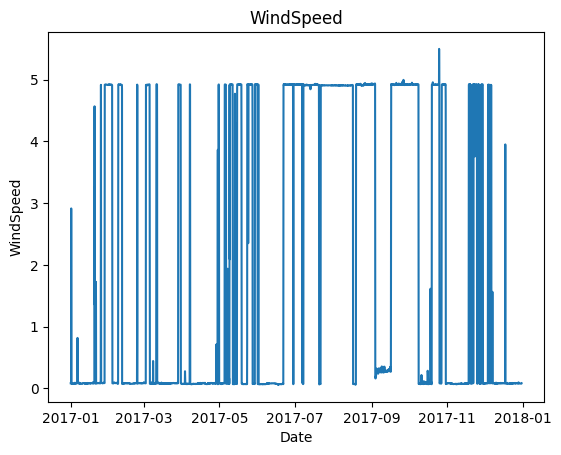

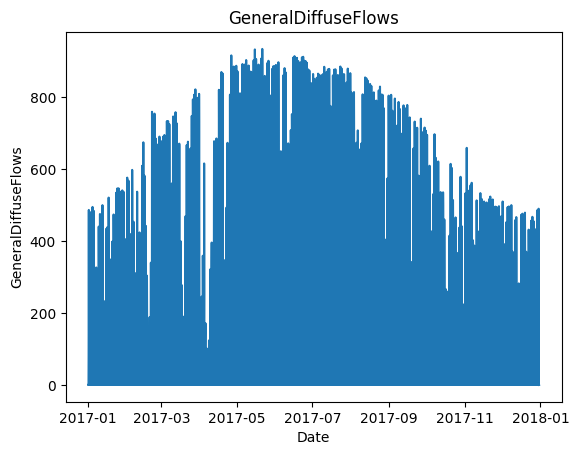

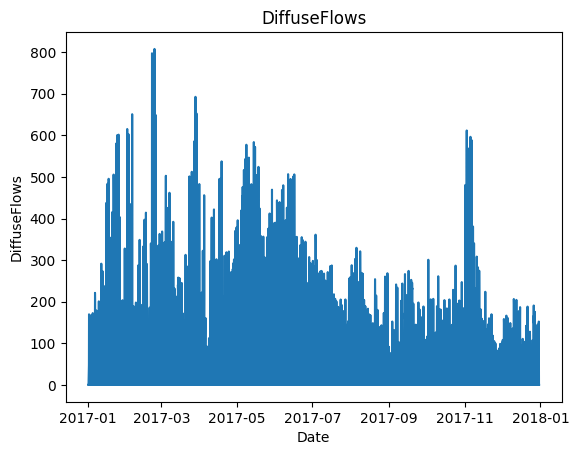

In [21]:
for feature in features:
    sns.lineplot(data[feature])
    plt.title(feature)
    plt.show()

<Axes: >

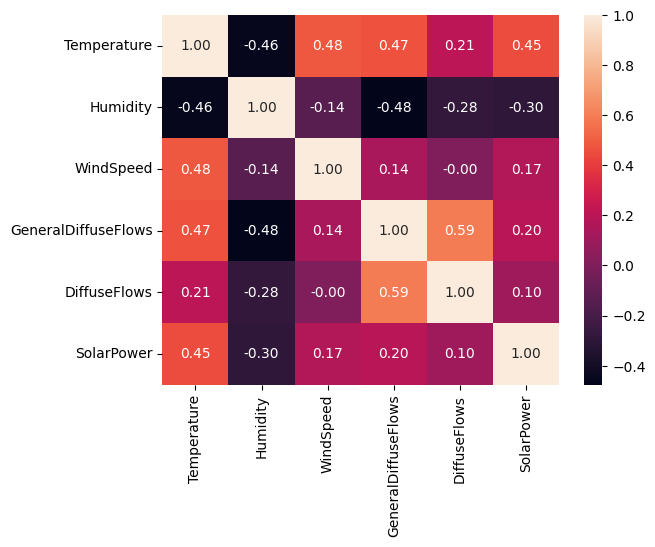

In [22]:
sns.heatmap(data.corr(), annot=True, fmt='.2f')

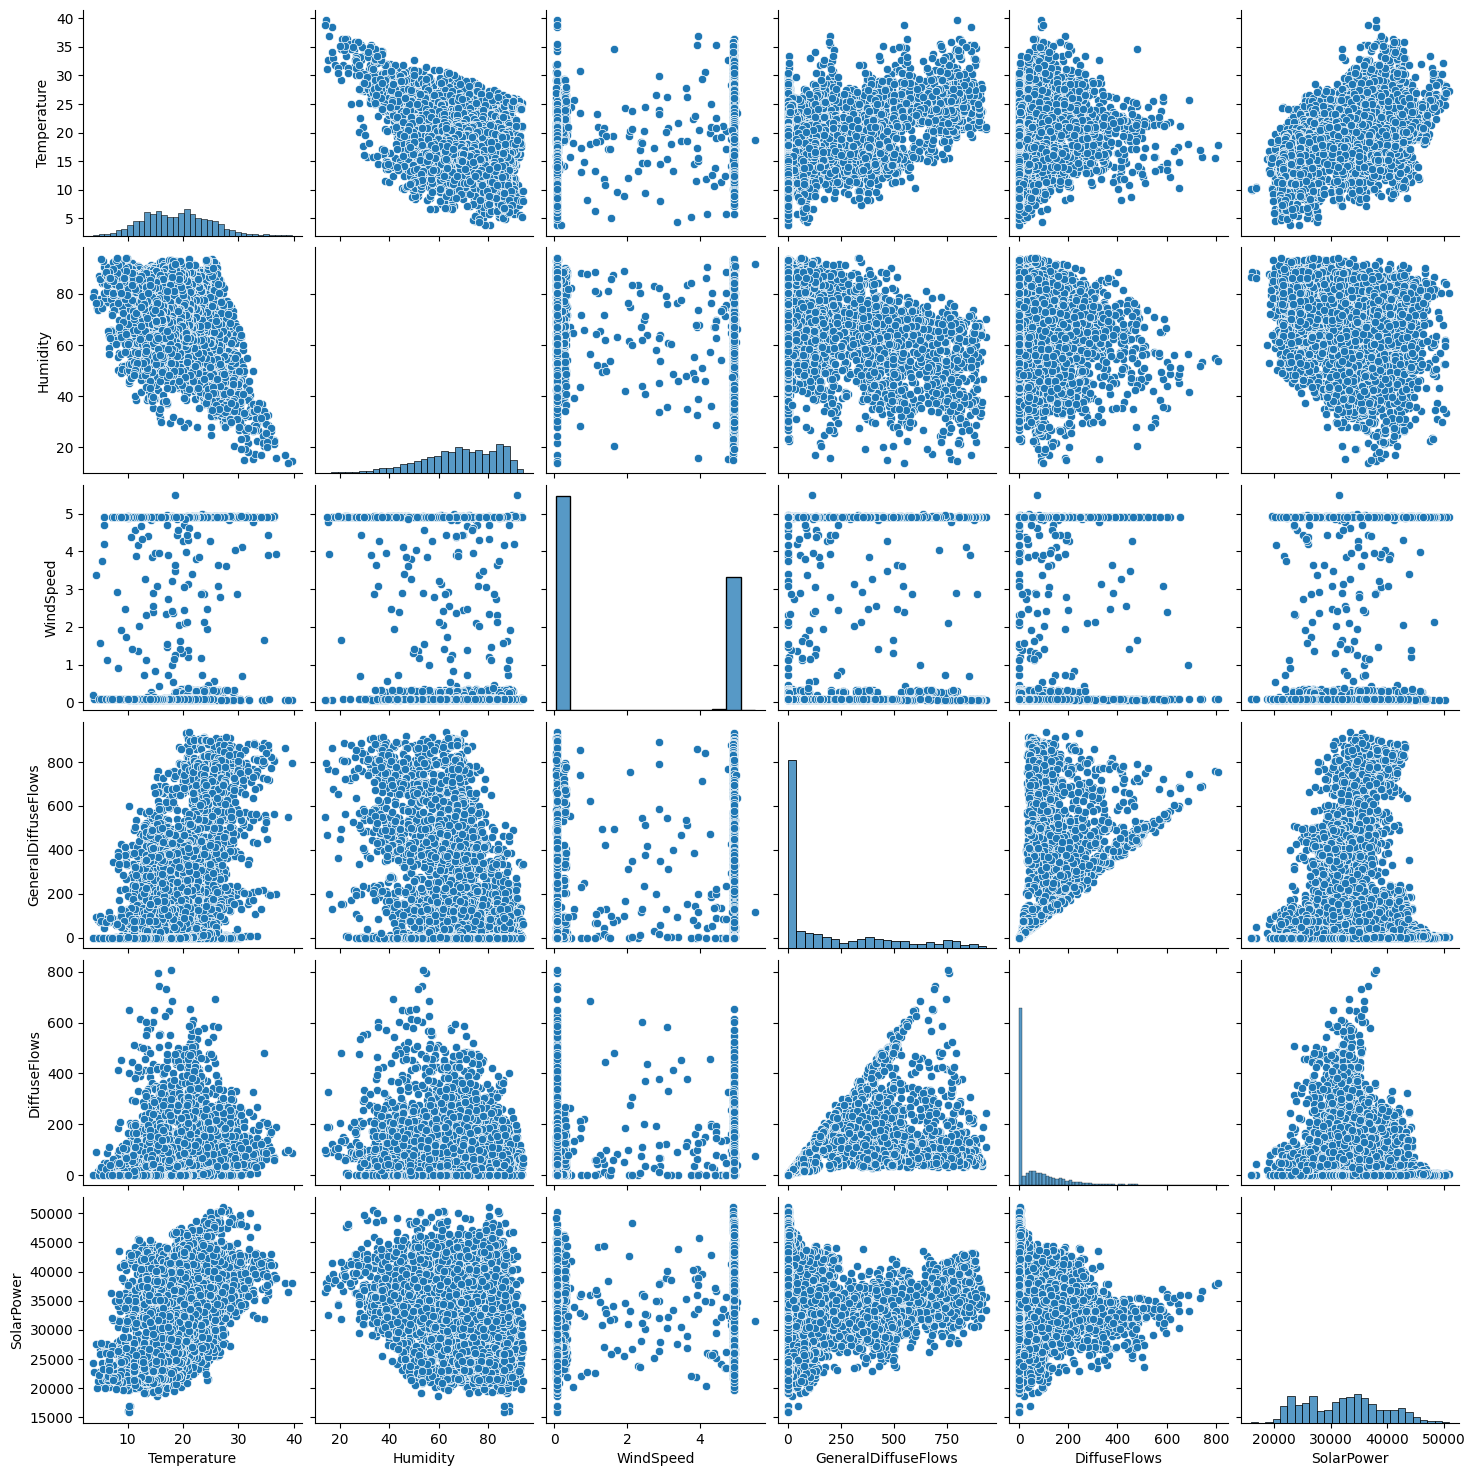

In [23]:
sns.pairplot(data)

In [24]:
lags = range(4, 0, -1)
cols = data.columns.tolist()

In [25]:
for lag in lags:
    for column in cols:
        data[f"{column}_{lag}"] = data[column].shift(lag)
data

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,SolarPower,Temperature_4,Humidity_4,WindSpeed_4,GeneralDiffuseFlows_4,...,WindSpeed_2,GeneralDiffuseFlows_2,DiffuseFlows_2,SolarPower_2,Temperature_1,Humidity_1,WindSpeed_1,GeneralDiffuseFlows_1,DiffuseFlows_1,SolarPower_1
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,5.866833,76.300000,0.081917,0.060167,0.105667,26927.594937,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01 02:00:00,5.029333,78.008333,0.082583,0.061417,0.135083,21447.088607,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5.866833,76.300000,0.081917,0.060167,0.105667,26927.594937
2017-01-01 04:00:00,4.919667,74.641667,0.081667,0.061917,0.120833,20641.518987,NaN,NaN,NaN,NaN,...,0.081917,0.060167,0.105667,26927.594937,5.029333,78.008333,0.082583,0.061417,0.135083,21447.088607
2017-01-01 06:00:00,4.512750,74.575000,0.082417,0.063583,0.122500,20094.683545,NaN,NaN,NaN,NaN,...,0.082583,0.061417,0.135083,21447.088607,4.919667,74.641667,0.081667,0.061917,0.120833,20641.518987
2017-01-01 08:00:00,4.632167,73.791667,0.082417,79.281917,15.761833,21255.189872,5.866833,76.300000,0.081917,0.060167,...,0.081667,0.061917,0.120833,20641.518987,4.512750,74.575000,0.082417,0.063583,0.122500,20094.683545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-30 14:00:00,14.513333,39.675417,0.077667,409.650000,42.163333,29293.789606,11.221667,48.974583,0.078417,0.062917,...,0.077000,353.441667,36.275833,29649.683142,14.399167,38.129167,0.077667,489.841667,38.455000,30490.240812
2017-12-30 16:00:00,14.015000,43.082500,0.077500,153.905000,152.368333,31262.864386,11.082500,48.224167,0.078083,76.933417,...,0.077667,489.841667,38.455000,30490.240812,14.513333,39.675417,0.077667,409.650000,42.163333,29293.789606
2017-12-30 18:00:00,10.112500,60.359583,0.075583,1.618917,1.676750,37721.673005,13.382500,43.325000,0.077000,353.441667,...,0.077667,409.650000,42.163333,29293.789606,14.015000,43.082500,0.077500,153.905000,152.368333,31262.864386


In [26]:
data = data.drop(columns=features)
data = data.dropna(axis=0)

In [27]:
data

,SolarPower,Temperature_4,Humidity_4,WindSpeed_4,GeneralDiffuseFlows_4,DiffuseFlows_4,SolarPower_4,Temperature_3,Humidity_3,WindSpeed_3,...,WindSpeed_2,GeneralDiffuseFlows_2,DiffuseFlows_2,SolarPower_2,Temperature_1,Humidity_1,WindSpeed_1,GeneralDiffuseFlows_1,DiffuseFlows_1,SolarPower_1
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-01 08:00:00,21255.189872,5.866833,76.300000,0.081917,0.060167,0.105667,26927.594937,5.029333,78.008333,0.082583,...,0.081667,0.061917,0.120833,20641.518987,4.512750,74.575000,0.082417,0.063583,0.122500,20094.683545
2017-01-01 10:00:00,27986.835442,5.029333,78.008333,0.082583,0.061417,0.135083,21447.088607,4.919667,74.641667,0.081667,...,0.082417,0.063583,0.122500,20094.683545,4.632167,73.791667,0.082417,79.281917,15.761833,21255.189872
2017-01-01 12:00:00,30060.759495,4.919667,74.641667,0.081667,0.061917,0.120833,20641.518987,4.512750,74.575000,0.082417,...,0.082417,79.281917,15.761833,21255.189872,8.019333,63.835833,2.913333,350.887500,34.108333,27986.835442
2017-01-01 14:00:00,29558.481012,4.512750,74.575000,0.082417,0.063583,0.122500,20094.683545,4.632167,73.791667,0.082417,...,2.913333,350.887500,34.108333,27986.835442,15.263333,57.075000,0.076167,486.391667,40.981667,30060.759495
2017-01-01 16:00:00,31576.708860,4.632167,73.791667,0.082417,79.281917,15.761833,21255.189872,8.019333,63.835833,2.913333,...,0.076167,486.391667,40.981667,30060.759495,15.662500,56.914167,0.075667,377.458333,48.125000,29558.481012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-30 14:00:00,29293.789606,11.221667,48.974583,0.078417,0.062917,0.112750,21307.984791,11.082500,48.224167,0.078083,...,0.077000,353.441667,36.275833,29649.683142,14.399167,38.129167,0.077667,489.841667,38.455000,30490.240812
2017-12-30 16:00:00,31262.864386,11.082500,48.224167,0.078083,76.933417,16.887500,23720.152091,13.382500,43.325000,0.077000,...,0.077667,489.841667,38.455000,30490.240812,14.513333,39.675417,0.077667,409.650000,42.163333,29293.789606
2017-12-30 18:00:00,37721.673005,13.382500,43.325000,0.077000,353.441667,36.275833,29649.683142,14.399167,38.129167,0.077667,...,0.077667,409.650000,42.163333,29293.789606,14.015000,43.082500,0.077500,153.905000,152.368333,31262.864386


In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x, y = data.drop(columns=['SolarPower']), data['SolarPower']

In [30]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.20, shuffle=False)

In [31]:
from sklearn.preprocessing import MinMaxScaler

In [32]:
scaler = MinMaxScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

In [33]:
scaler = MinMaxScaler()
train_y = scaler.fit_transform(train_y.to_numpy().reshape(-1, 1))

In [34]:
lags = 4
(train_x.shape[0], lag, (train_x.shape[1] // lag))

(3491, 1, 24)

In [35]:
train_x = train_x.reshape(train_x.shape[0], lag, (train_x.shape[1] // lag))
test_x = test_x.reshape(test_x.shape[0], lag, (test_x.shape[1] // lag))

In [36]:
from keras.models import Sequential
from keras.layers import Input, LSTM, Dense

In [107]:
model = Sequential([
    Input((train_x.shape[1], train_x.shape[2],)),
    LSTM(32, activation="relu", return_sequences=True),
    LSTM(16, activation="relu"),
    Dense(1, activation="linear")
])

In [108]:
model.compile(
    loss="mean_squared_error",
    optimizer="adam",
    metrics=["mean_squared_error"],
)

In [109]:
history = model.fit(train_x, train_y, validation_split=0.20, epochs=8, batch_size=16, shuffle=False)

Epoch 1/8


175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1151 - mean_squared_error: 0.1151 - val_loss: 0.0169 - val_mean_squared_error: 0.0169
Epoch 2/8
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0200 - mean_squared_error: 0.0200 - val_loss: 0.0138 - val_mean_squared_error: 0.0138
Epoch 3/8
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0163 - mean_squared_error: 0.0163 - val_loss: 0.0114 - val_mean_squared_error: 0.0114
Epoch 4/8
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0133 - mean_squared_error: 0.0133 - val_loss: 0.0100 - val_mean_squared_error: 0.0100
Epoch 5/8
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0112 - mean_squared_error: 0.0112 - val_loss: 0.0090 - val_mean_squared_error: 0.0090
Epoch 6/8
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.0082 - val_mean_squared_error: 0.0082
Epoch 7/8
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.0077 - val_mean_squ

<Axes: >

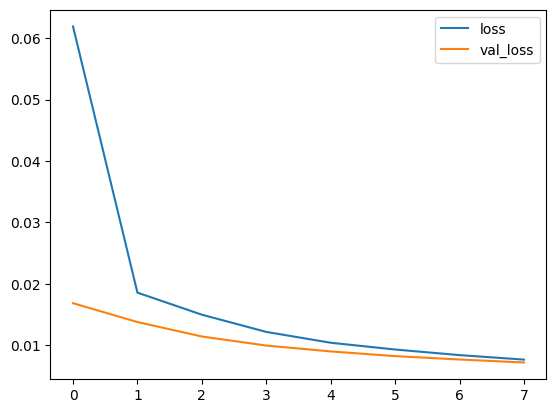

In [110]:
sns.lineplot(history.history["loss"], label="loss")
sns.lineplot(history.history["val_loss"], label="val_loss")

In [111]:
predicted = model.predict(test_x)   

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [112]:
predicted = scaler.inverse_transform(predicted)

In [113]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [114]:
(mean_absolute_error(test_y, predicted), mean_squared_error(test_y, predicted), r2_score(test_y, predicted))

(2867.9806491077225, 11627626.630844634, 0.6748888394260277)

<Axes: xlabel='Date'>

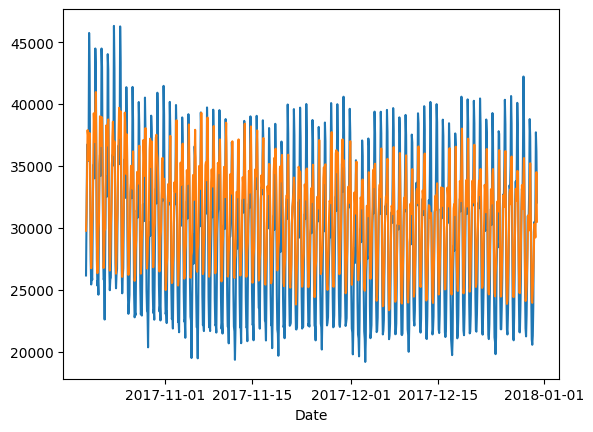

In [115]:
sns.lineplot(x=test_y.index, y=test_y.values)
sns.lineplot(x=test_y.index, y=predicted.flatten())